<a href="https://colab.research.google.com/github/2000KruthiR/DEVTERN-DETECTING-FAKE-NEWS/blob/main/Dr_Semmelweis_and_the_effect_of_handwashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Discovery of Handwashing Steps:
####  Import necessary libraries
####  Read the yearly deaths dataset
####  Explore the dataset
####  Read and explore the monthly deaths dataset
####  Investigate the number of deaths from 1841 to 1846

### I- Yearly data

## step 1- Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## step 2- Read the yearly deaths dataset

In [ ]:
#Read the yearly dataset
yearly=pd.read_csv("/content/yearly_deaths_by_clinic.csv")
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## step 3- Explore the dataset

In [ ]:
#Geting the shape of the dataset
print(yearly.shape)

(12, 4)


In [ ]:
#Geting the information of the dataset
print(yearly.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes
None


In [ ]:
# Group by clinic and sum the deaths
print(yearly.groupby("clinic")["deaths"].sum())

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64


#### The above results shows us the number of births and deaths in 2 clinics from the year 1841 till 1846. It's obvious that the number of deaths in clinic 1 is higher than that of clinic 2.

## step 4- Calculate the proportion of deaths

In [ ]:
#To make the analysis easier, we can calculate the proportion of deaths.
yearly["Proportion of Deaths"] = yearly["deaths"] / yearly["births"]
print(yearly)

    year  births  deaths    clinic  Proportion of Deaths
0   1841    3036     237  clinic 1              0.078063
1   1842    3287     518  clinic 1              0.157591
2   1843    3060     274  clinic 1              0.089542
3   1844    3157     260  clinic 1              0.082357
4   1845    3492     241  clinic 1              0.069015
5   1846    4010     459  clinic 1              0.114464
6   1841    2442      86  clinic 2              0.035217
7   1842    2659     202  clinic 2              0.075968
8   1843    2739     164  clinic 2              0.059876
9   1844    2956      68  clinic 2              0.023004
10  1845    3241      66  clinic 2              0.020364
11  1846    3754     105  clinic 2              0.027970


## step 5- Separate the dataset into two datasets, one for each clinic

In [ ]:
#Separate the dataset into 2 datasets, one for each clinic
clinic_1 = yearly[yearly["clinic"] == "clinic 1"]
clinic_2 = yearly[yearly["clinic"] == "clinic 2"]

In [ ]:
clinic_1

,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [ ]:
clinic_2

,year,births,deaths,clinic,Proportion of Deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


## step 6- Visualize the number of deaths every year in both clinics

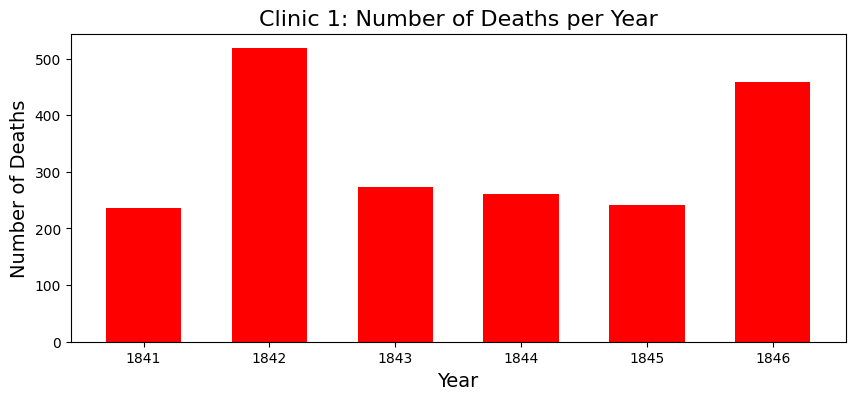

In [ ]:
# Clinic 1
fig, ax = plt.subplots(figsize=(10, 4))
plt.bar(clinic_1.year, clinic_1.deaths, width=0.6, color="red")
plt.title("Clinic 1: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)
plt.show()

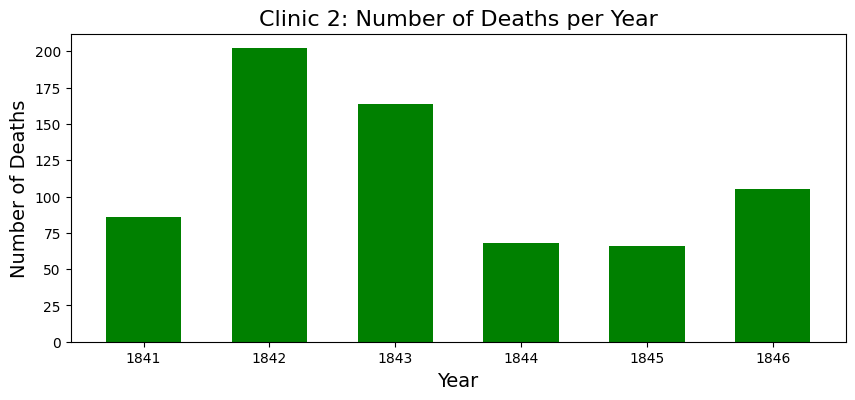

In [ ]:
# Clinic 2
fig, ax = plt.subplots(figsize=(10, 4))
plt.bar(clinic_2.year, clinic_2.deaths, width=0.6, color="green")
plt.title("Clinic 2: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)
plt.show()

#### It seems that 1842 was a pretty hectic year in both clinic 1 & 2 where the numbers of deaths were 518 and 202 respectively

## step 7- Plot the proportion of deaths in clinic 1 and 2

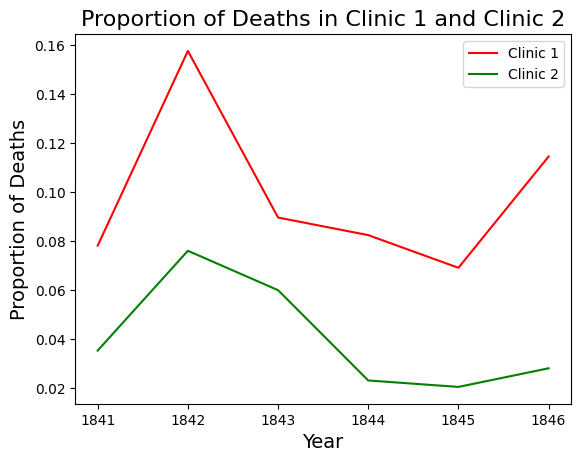

In [ ]:
ax = clinic_1.plot(x="year", y="Proportion of Deaths", label="Clinic 1", color="red")
clinic_2.plot(x="year", y="Proportion of Deaths", label="Clinic 2", ax=ax, ylabel="Proportion of Deaths", color="green")
plt.title("Proportion of Deaths in Clinic 1 and Clinic 2", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)
plt.show()

#### By looking further into why this happened, Dr Semmelweis realized that many medical students worked at clinic 1 who also as a part of their study, spend a lot of time in the autopsy room. So, he realized that dealing with corpses spread bacteria that would be transferred to the women giving birth, infecting them with the deadly childbed fever, which was the main reason for the high mortality rates.


### II- Monthly data

## 1- Read the monthly deaths dataset

In [ ]:
# Read the monthly dataset
monthly= pd.read_csv("/content/monthly_deaths.csv")
monthly.head(5)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


## 2- Explore the monthly dataset

In [ ]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


## step 3- Calculate the proportion of deaths per month

In [ ]:
#Calculate the proportion of deaths per month
monthly["Proportion of Deaths"]= monthly["deaths"] / monthly["births"]
monthly.head(5)

,date,births,deaths,Proportion of Deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


#### Dr Semmelweis ordered the doctors to wash their hands and made it obligatory in the summer of 1847 to see if that will affect the number of deaths, and since we have the monthly data now, we can trace the number of deaths before and after the handwashing started.

## step 4- Change the data type of "date" column from string to datetime

In [ ]:
#Change the data type of "date" column from string to datatime
monthly.dtypes
monthly['date'] =  pd.to_datetime(monthly['date'])

## step 5- Label the date at which handwashing started and split the data

In [ ]:
# Label the date at which handwashing started to "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < start_handwashing]
after_washing = monthly[monthly["date"] >= start_handwashing]

## step 6- Visualize the proportion of deaths before and after handwashing

### Before Handwashing

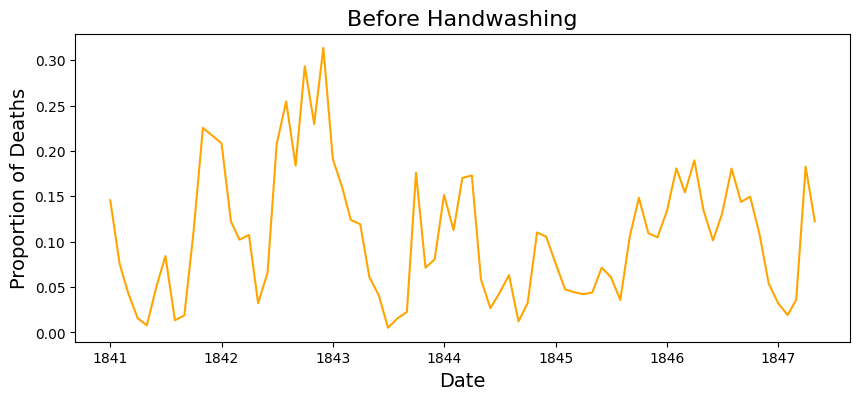

In [ ]:
# Before Handwashing
fig, ax = plt.subplots(figsize=(10, 4))
x = before_washing["date"]
y = before_washing["Proportion of Deaths"]
plt.plot(x, y, color="orange")
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)
plt.show()

### After Handwashing

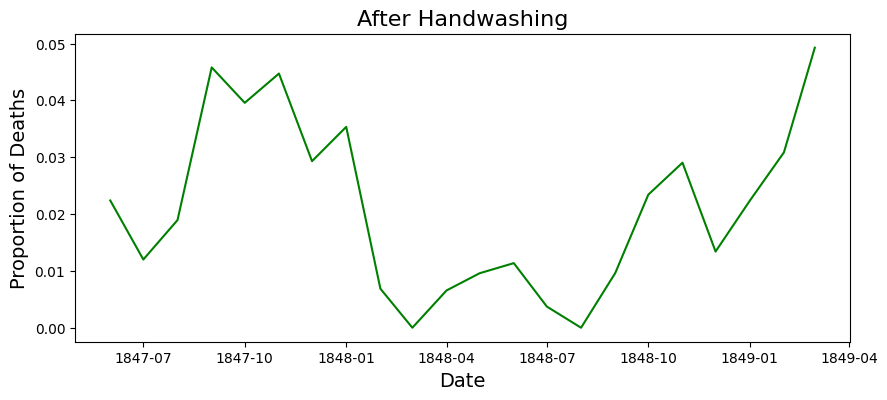

In [ ]:
# After Handwashing
fig, ax = plt.subplots(figsize=(10, 4))
x = after_washing["date"]
y = after_washing["Proportion of Deaths"]
plt.plot(x, y, color="green")
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)
plt.show()

#### To see the difference clearly, let's combine the 2 plots in one chart.

## step 7- Combine the plots in one chart

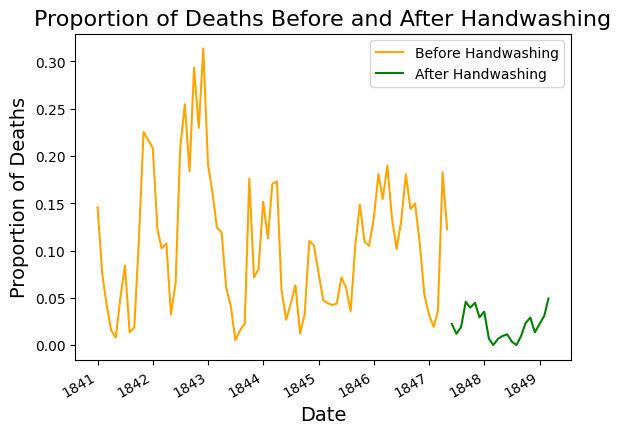

In [ ]:
ax = before_washing.plot(x="date", y="Proportion of Deaths", label="Before Handwashing", color="orange")
after_washing.plot(x="date", y="Proportion of Deaths", label="After Handwashing", ax=ax, ylabel="Proportion of Deaths", color="green")
plt.title("Proportion of Deaths Before and After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)
plt.show()

#### The difference is pretty clear! the proportion of deaths dramatically decreased after handwashing was made obligatory.

#### Let's calculate exactly how much did handwashing decreased the proportion of deaths on average.

## step 8- Calculate the average proportion of deaths before and after handwashing

In [ ]:
before_proportion = before_washing["Proportion of Deaths"]
after_proportion = after_washing["Proportion of Deaths"]

In [ ]:
# Calculate the mean proportions
before_proportion.mean()

0.10504998260908789

In [ ]:
# Calculate the difference
after_proportion.mean()

0.021093375097254535

In [ ]:
# Calculate the difference between both proportions
mean_diff = after_proportion.mean() - before_proportion.mean()
print(f"Difference in proportion of deaths: {mean_diff}")

Difference in proportion of deaths: -0.08395660751183336


#### The minus sign indicate that there is a decrease. So handwashing decreased the proportion of deaths from 10% to 2% i.e, by approximately 8%.

## step 9- Perform a hypothesis test

In [ ]:
# Import the stats module from the SciPy library
from scipy import stats

# Perform an independent t-test
t_stat, p_val = stats.ttest_ind(before_proportion, after_proportion)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Check if the p-value is less than 0.05
if p_val < 0.05:
    print("The difference in proportions is statistically significant.")
else:
    print("The difference in proportions is not statistically significant.")

T-statistic: 5.511607211341916
P-value: 2.985436556724523e-07
The difference in proportions is statistically significant.


## step 10- Advanced visualizations with Seaborn

In [ ]:
!pip install pandas seaborn matplotlib

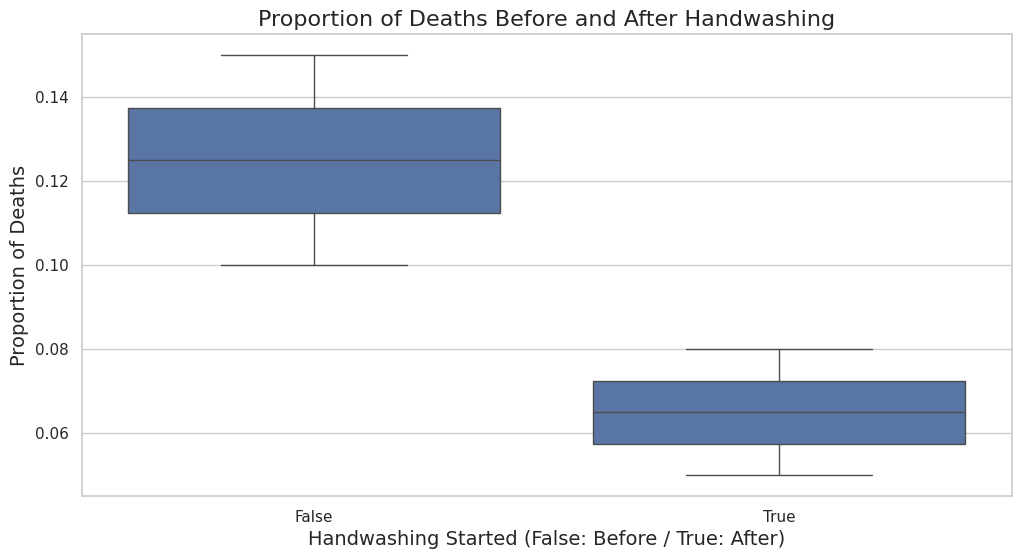

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a new column to indicate before/after handwashing
monthly['Handwashing_Started'] = monthly['date'] >= start_handwashing

# Visualize the proportion of deaths before and after handwashing using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Handwashing_Started", y="Proportion of Deaths", data=monthly)
plt.title("Proportion of Deaths Before and After Handwashing", fontsize=16)
plt.xlabel("Handwashing Started (False: Before / True: After)", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)
plt.show()

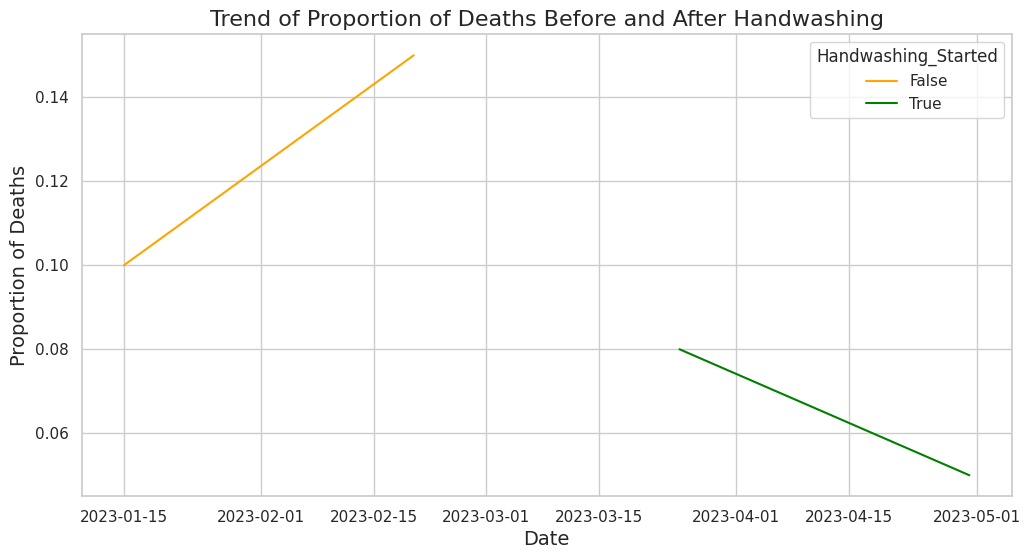

In [ ]:
# Visualize the trend using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x="date", y="Proportion of Deaths", hue="Handwashing_Started", palette=["orange", "green"])
plt.title("Trend of Proportion of Deaths Before and After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)
plt.show()

##Summary

The analysis demonstrated that the introduction of handwashing significantly reduced mortality rates in Clinic 1. This finding supports the hypothesis that improved hygiene practices can have a profound impact on patient outcomes, particularly in medical settings. The project highlighted the importance of data-driven approaches in identifying and implementing effective health interventions.